In [1]:
import sklearn
import tensorflow
import keras
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pickle
from matplotlib import style


In [2]:
data=pd.read_csv("student-mat.csv", sep=";")
data 


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Linear Regression

In [3]:

data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [7]:
studentdata= data[['G1', 'G2', 'G3','studytime','failures','absences']]

In [8]:
studentdata

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4
...,...,...,...,...,...,...
390,9,9,9,2,2,11
391,14,16,16,1,0,3
392,10,8,7,1,3,3
393,11,12,10,1,0,0


In [9]:
predict='G3'

In [ ]:
X=np.array(studentdata.drop([predict],axis=1))
y=np.array(studentdata[predict])

In [11]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)

Linear regression is for data that directly correlates.

In [12]:
#how accurate the model will be
linearmodel=linear_model.LinearRegression()
linearmodel.fit(x_train,y_train)
acc=linearmodel.score(x_test,y_test)
print(acc)


0.7775536263116758


The for loop in the new cell here is for saving the model with the highest accuracy. the for loop is to continually train the model until you get one that has the highest accuracy

In [13]:
for i in range(10):
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)
    linearmodel=linear_model.LinearRegression()
    linearmodel.fit(x_train,y_train)
    acc=linearmodel.score(x_test,y_test)
    print(acc)
    
    best=acc
    if acc>best:
        
        with open("studentmodel.pickle","wb") as f:
            pickle.dump(linearmodel,f)

0.8596198917386129
0.8182949899186833
0.8035692328665066
0.681734013044305
0.60584944206174
0.7969102476818432
0.8202558927074415
0.8017112066425691
0.8165996769502091
0.8725657791443769


The model saved is in binary and when ready to use it you can load it.

In [14]:
#pickle is for saving models
with open("studentmodel.pickle","wb") as f:
    pickle.dump(linearmodel,f)

pickle_in=open("studentmodel.pickle","rb")
linearmodel=pickle.load(pickle_in)

In [15]:
print('Coefficient:\n', linearmodel.coef_)
print("Intercept:\n", linearmodel.intercept_)

Coefficient:
 [ 0.1475598   0.97092885 -0.23312436 -0.31564122  0.03477646]
Intercept:
 -1.219405550708471


In [16]:
predictions=linearmodel.predict(x_test)

In [17]:
for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

10.687273861396163 [11 11  2  0  2] 11
19.238487308563734 [19 19  4  0  4] 20
16.279717136291268 [16 16  2  0  2] 16
9.25765396679343 [ 9 10  3  0  4] 10
11.3047373400963 [12 12  4  0  1] 12
11.993899669302662 [14 12  2  1  8] 12
9.49077832433049 [ 9 10  2  0  4] 10
13.44404117820649 [14 13  1  0  6] 13
10.834833665892337 [12 11  2  0  2] 12
8.658955318666695 [9 9 2 0 8] 9
15.013668676816073 [14 15  2  0  2] 15
11.035038473443787 [11 11  2  0 12] 11
7.318843953112241 [8 8 1 1 4] 8
9.64679208850379 [11 10  2  0  0] 10
8.43428492080676 [10  9  3  0  4] 9
7.262254974049574 [8 8 2 0 0] 0
5.910641961533495 [7 7 3 0 0] 8
10.351677031463968 [10 11  4  0 10] 11
8.58940239625717 [9 9 2 0 6] 10
7.90513919508955 [10  8  2  0 10] 8
16.07291528028184 [15 16  3  0  7] 15
7.064862229748629 [ 9  7  2  0 18] 6
12.629131562361854 [11 13  2  0  2] 13
18.38789947232653 [18 18  3  0  5] 19
17.18109306436459 [16 17  2  0  0] 17
3.9718319478523014 [6 5 1 1 0] 0
8.344215854561051 [ 7 10  4  1  2] 10
9.2540991

Text(0, 0.5, 'Final Grade')

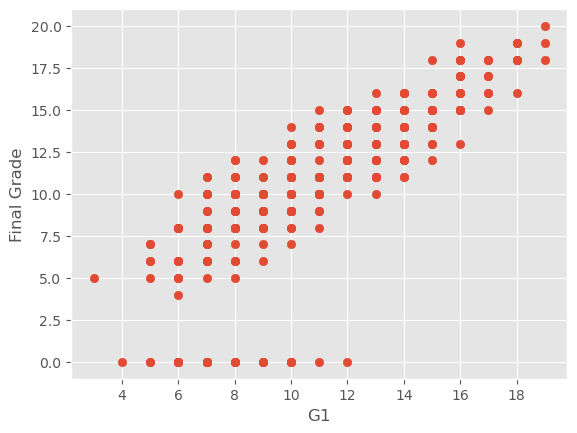

In [18]:
p='G1'
style.use("ggplot")
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")

Text(0, 0.5, 'Final Grade')

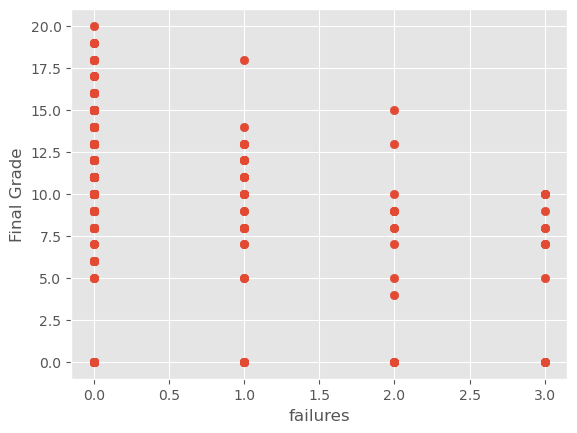

In [20]:
p='failures'
style.use("ggplot")
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")

Text(0, 0.5, 'Final Grade')

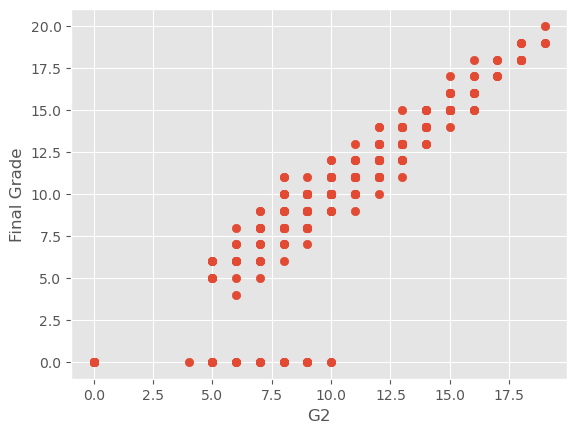

In [21]:
p='G2'
style.use("ggplot")
plt.scatter(data[p],data["G3"])
plt.xlabel(p)
plt.ylabel("Final Grade")